In [1]:
import os
os.chdir("C:\\Users\\Jyotsna Nag\\Desktop\\Machine Learning\\Kaggle Projects\\Mall Customers")

In [2]:
os.getcwd()

'C:\\Users\\Jyotsna Nag\\Desktop\\Machine Learning\\Kaggle Projects\\Mall Customers'

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv("Mall_customers.csv")
X = dataset.iloc[:, [3,4]].values
print(dataset.shape)

(200, 5)


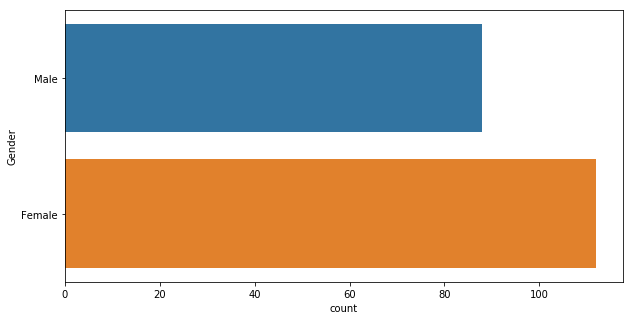

In [4]:
plt.figure (figsize = (10,5))
sns.countplot(y="Gender",data = dataset)
plt.show()

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
dataset.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
dataset.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

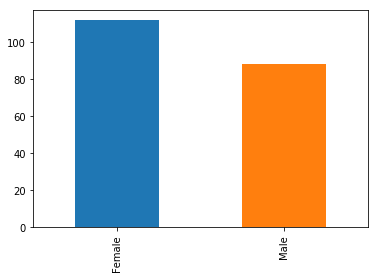

In [9]:
dataset['Gender'].value_counts().plot.bar()

Text(0.5,1,'Gender analysis')

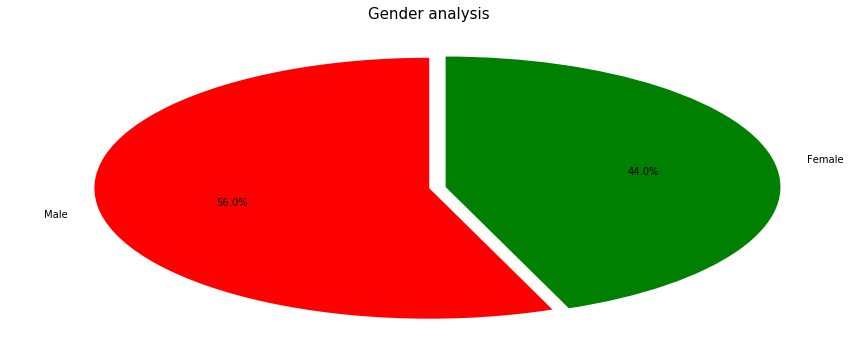

In [10]:
labels = ["Male", "Female"]
colors = ["red", "green"]
explode = [0,0.05]
values = dataset.Gender.value_counts().values
plt.figure(figsize = (15,6))
plt.pie(values, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", startangle = 90)
plt.title ("Gender analysis", color = "Black", fontsize = 15)

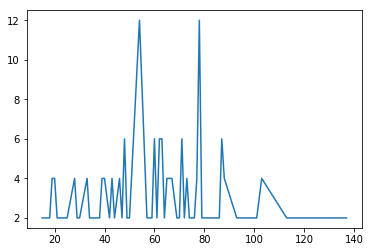

In [11]:
dataset['Annual Income (k$)'].value_counts().sort_index().plot.line()

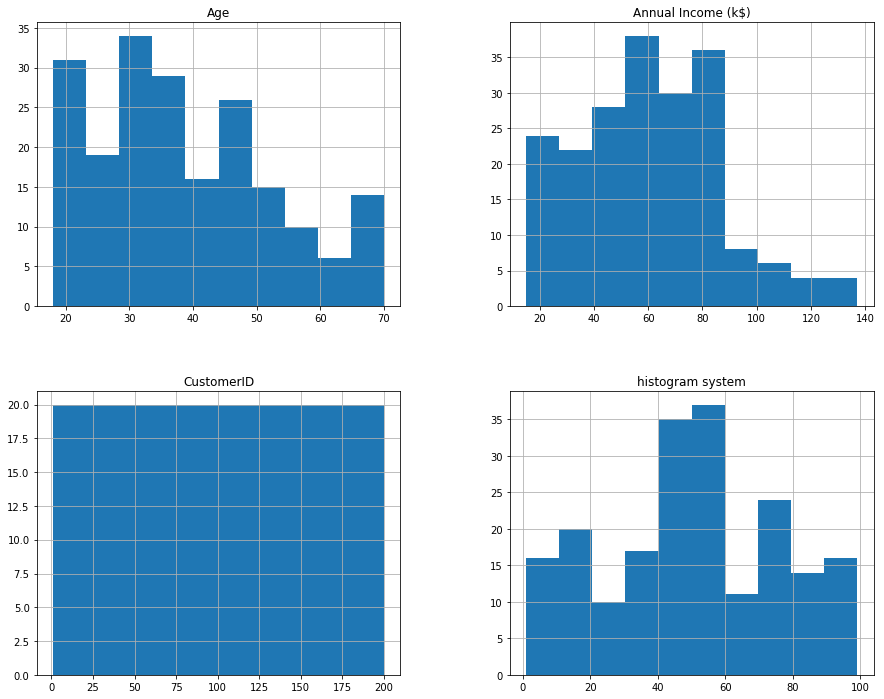

In [12]:
dataset.hist(figsize = (15,12))
plt.title("histogram system")
plt.show()

Text(0.5,1,'Area plot of Annual income')

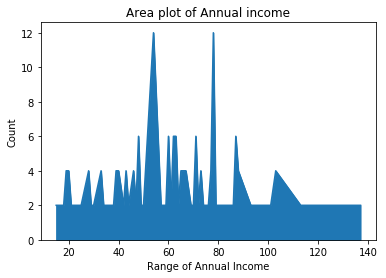

In [13]:
dataset['Annual Income (k$)'].value_counts().sort_index().plot.area()
plt.xlabel ("Range of Annual Income")
plt.ylabel ("Count")
plt.title ("Area plot of Annual income")

Text(0.5,1,'Area plot of Spending Score')

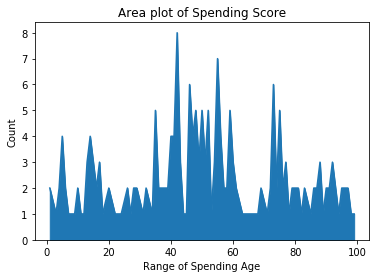

In [14]:
dataset['Spending Score (1-100)'].value_counts().sort_index().plot.area()
plt.xlabel ("Range of Spending Age")
plt.ylabel ("Count")
plt.title ("Area plot of Spending Score")

Text(0.5,1,'Area plot of Age')

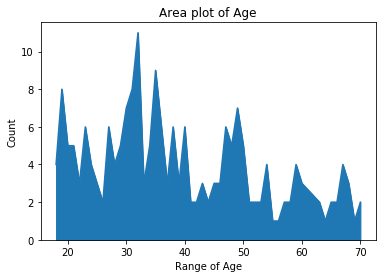

In [15]:
dataset['Age'].value_counts().sort_index().plot.area() 
plt.xlabel ("Range of Age")
plt.ylabel ("Count")
plt.title ("Area plot of Age")

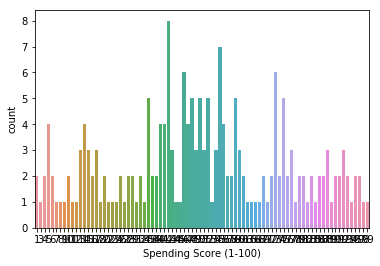

<Figure size 1080x216 with 0 Axes>

In [16]:
sns.countplot(dataset["Spending Score (1-100)"])
plt.figure(figsize = (15,3))
plt.show()


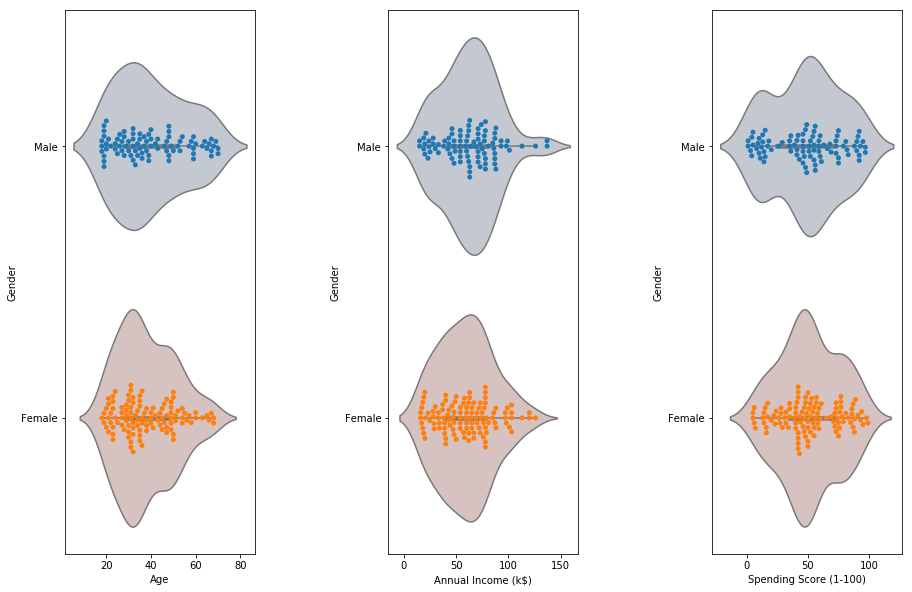

In [17]:
plt.figure(1, figsize = (15,10))
n=0
for columns in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust (hspace = 0.7, wspace = 0.7)
    sns.violinplot(x = columns, y = "Gender", data = dataset, palette = "vlag", saturation = 0.5 )
    sns.swarmplot(x = columns, y = "Gender", data = dataset)
plt.show()


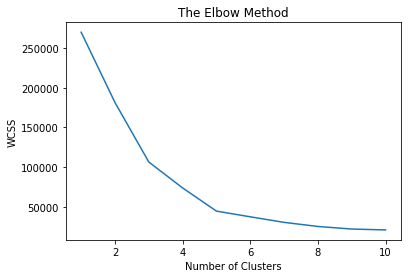

In [21]:
# K-means Clustering
#Using the elbow method to find optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

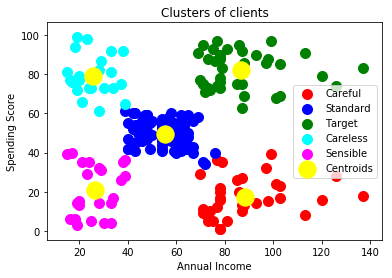

In [22]:
#Applying k-means to the mall dataset
kmeans = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, random_state = 0, n_init = 10)
y_kmeans = kmeans.fit_predict(X)

#Visualising the clusters
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 100, c = "red", label = "Careful")
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 100, c = "blue", label = "Standard")
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 100, c = "green", label = "Target")
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s = 100, c = "cyan", label = "Careless")
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s = 100, c = "magenta", label = "Sensible")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = "yellow", label = "Centroids")
plt.title("Clusters of clients")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()


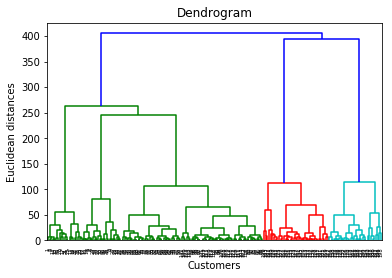

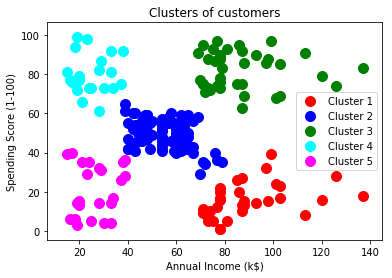

In [23]:
# Hierarchical Clustering
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()